In [5]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784')

C:\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [6]:
mnist.data.shape

(70000, 784)

In [9]:
def showimage(dframe,index):
    some_digit = dframe.to_numpy()[index]
    some_digit_image=some_digit.reshape(28,28)

    plt.imshow(some_digit_image,cmap='binary')
    plt.axis("off")
    plt.show()

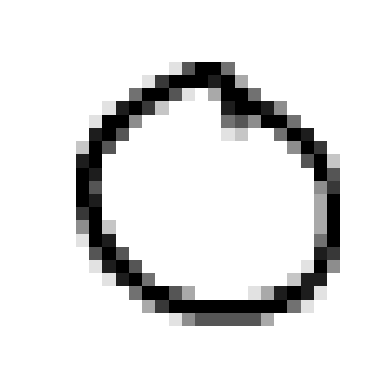

In [17]:
showimage(mnist.data,68)

In [27]:

# test ve train oranı 1/7 ve 6/7
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [29]:
type(train_img)

pandas.core.frame.DataFrame

In [31]:
test_img_copy=test_img.copy()

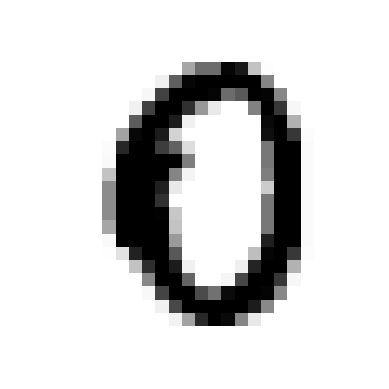

In [33]:
showimage(test_img_copy,0)

In [39]:
scaler = StandardScaler()

# Scaler'ı sadece training set üzerinde fit yapmamız yeterli..
scaler.fit(train_img)

# Ama transform işlemini hem training sete hem de test sete yapmamız gerekiyor..
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [41]:
# PCA
pca = PCA(.95)

In [43]:
pca.fit(train_img)

PCA(n_components=0.95)

In [45]:
print(pca.n_components_)

327


In [47]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [61]:
# default solver çok yavaş çalıştığı için daha hızlı olan 'lbfgs' solverı seçerek logisticregression nesnemizi oluşturuyoruz.
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=10000)


In [63]:
# (Birkaç dk sürebilir)
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(max_iter=10000)

In [67]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

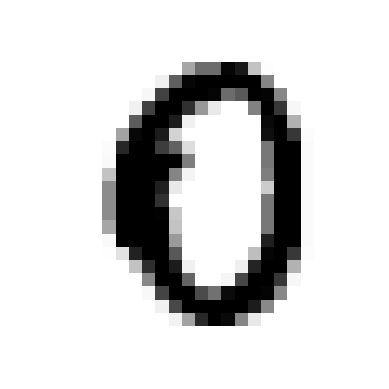

In [69]:
showimage(test_img_copy,0)

In [77]:
logisticRegr.predict(test_img[68].reshape(1,-1))

array(['2'], dtype=object)

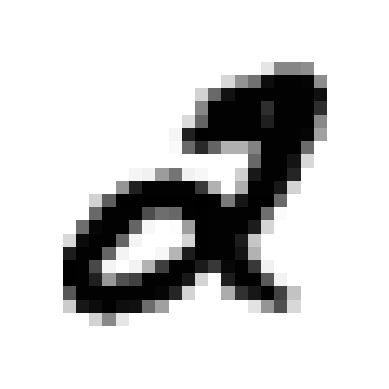

In [79]:
showimage(test_img_copy,68)

In [81]:
logisticRegr.score(test_img,test_lbl)

0.9184